In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge

df = pd.read_csv("data_3dprinter.csv")
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True)

if 'infill_pattern' in df.columns:
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True)


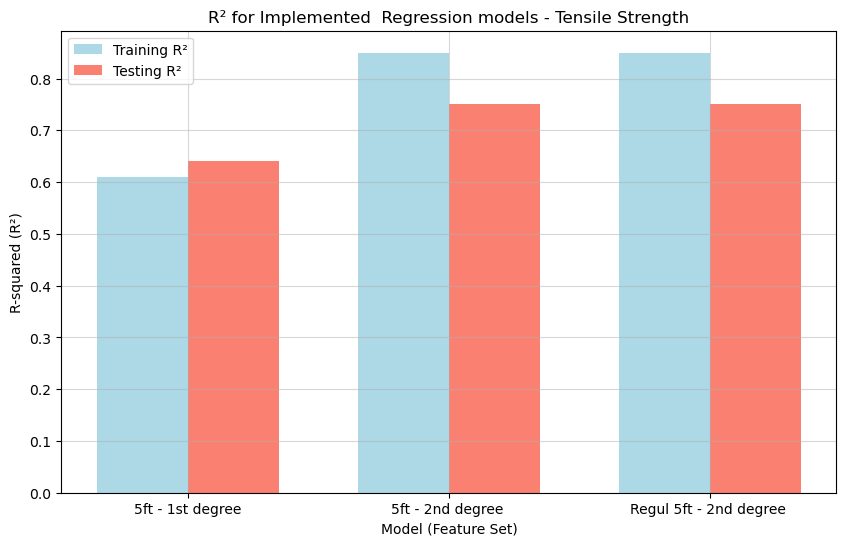

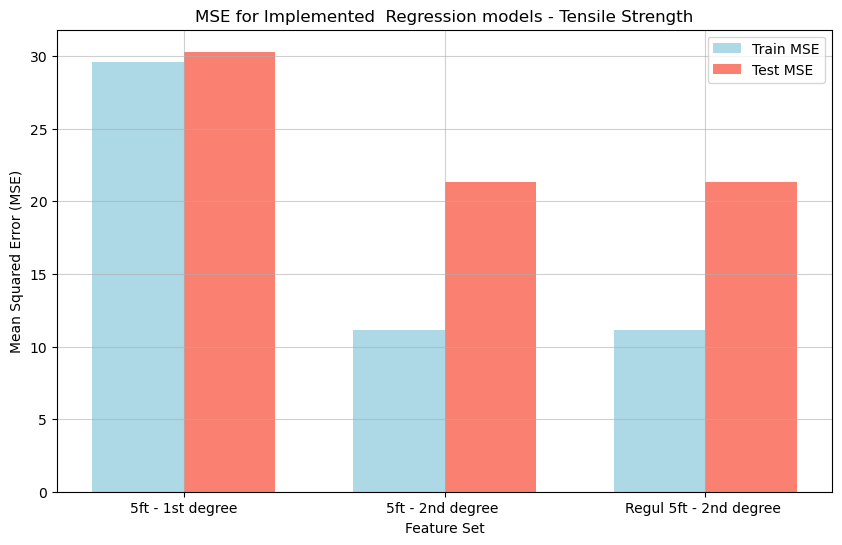

In [23]:
#Correation values for all the models 
r2_data = {
    "Model": [ "5ft - 1st degree",  "5ft - 2nd degree ", "Regul 5ft - 2nd degree "],
    "Degree": [ 2, 2,2 ],
    "Train R2": [ 0.61, 0.85, 0.85 ], 
    "Test R2":  [ 0.64, 0.75, 0.75] } 

r2_df = pd.DataFrame(r2_data)#Making the above in[uted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for Implemented  Regression models - Tensile Strength")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

data = {
    "Model": [ "5ft - 1st degree",  "5ft - 2nd degree ", "Regul 5ft - 2nd degree "],
    "Degree": [ 2, 2, 2],
    "Train MSE": [ 29.6, 11.16, 11.15 ],  
    "Test MSE":  [ 30.3, 21.3, 21.3] } 

mse_df = pd.DataFrame(data)

# Plot
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Train MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Test MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Implemented  Regression models - Tensile Strength")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

Random state of the model as well as the train/test split kept the same as for the models with the sklearn library, for the fairness of the comparison. 

* 1st Model 5 features Linear Regression- Underfitting -
This is due to small values of the R^2 for both Training and testing sets. The MSE errors are also very high for this model implying of the poor perfomance of the model. The implemented model with the gradient descent shows the same values of the key parameters as the same complexity model, but with the sklear. This implies that the implemented model is correct, with reasanable hyperparameters settings. 

* 2nd Model 5 Features 2nd Degree Polynomial Regression - Better fit, slightly overfitting -
This model shows higher correlation values, R^2 for both training and testing sets. However the variation between the training and testing sets for both R^2 and MSE signifying of the possible overfit. The gradient descent model showed slightly worse perfomance than the model with the sklearn library. 

* 2nd Model 5 Features 2nd Degree Reguralised Polynomial Regression- No perfomance change - 
The reguralisation did not change the key parameters of the model, however adding reguralisation could be potentially usefull of the dataset is larger and containing more noisy data.


Overall 5 features 2nd  degree polynomial regression is a better fit for this data. However, the better model would be better fit implemented with the sklearn library. 


Polynomial Regression 1st Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 4.43
Mean Squared Error (MSE): 29.66
Root Mean Squared Error (RMSE) : 5.45
R-squared (R²): 0.61

Testing Set:
Mean Absolute Error (MAE) : 4.49
Mean Squared Error (MSE) : 30.33
Root Mean Squared Error (RMSE): 5.51
R-squared (R²) : 0.64


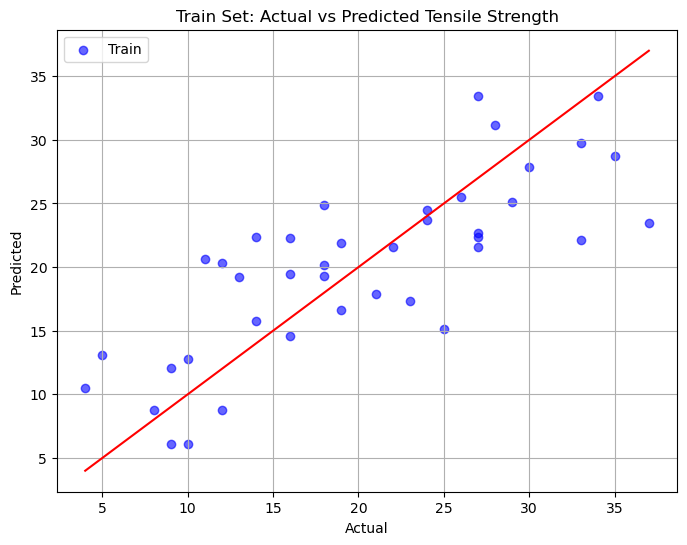

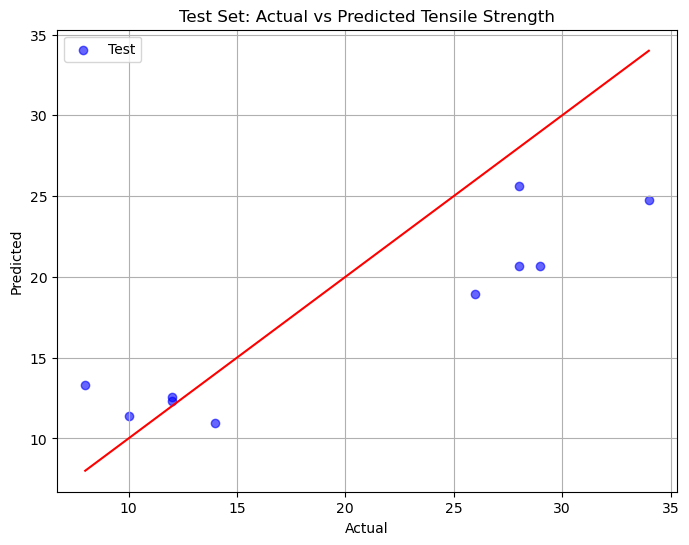

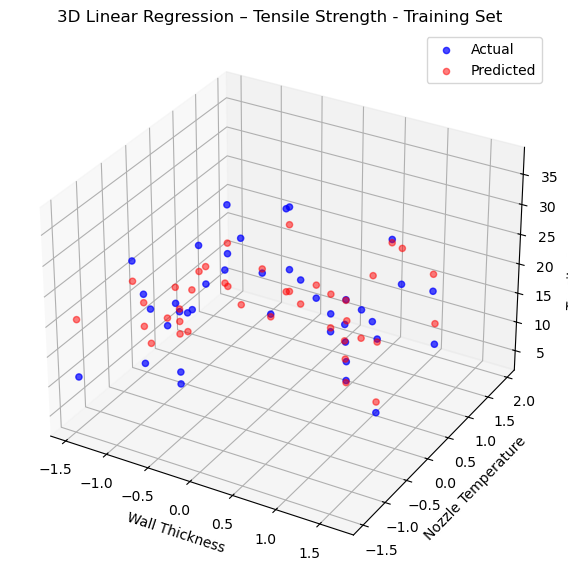

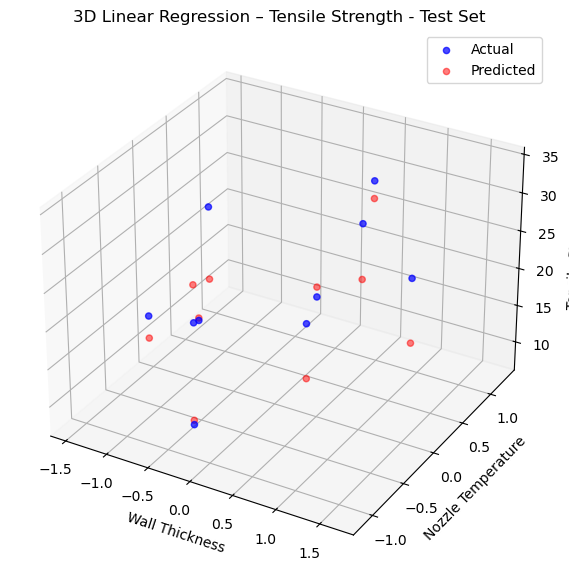

In [6]:

X = df[['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']].values
y = df['tensile_strength'].values.reshape(-1, 1)

#Normalising features
X = (X - X.mean(axis=0)) / X.std(axis=0)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#Linear Regression using Gradient Descent
class LinearRegressionImplement:
    def __init__(self, learning_rate=0.08, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Model training
model = LinearRegressionImplement(learning_rate=0.08, iterations=5000)
model.fit(X_train, y_train)

#Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluate performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nPolynomial Regression 1st Degree - 5 Features- Tensile Strength")
#Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Plotting Predictions vs Actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', label="Train")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.title("Train Set: Actual vs Predicted Tensile Strength")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label="Test")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.title("Test Set: Actual vs Predicted Tensile Strength")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()
plt.show()


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 0], y_train.flatten(), color='blue', label='Actual', alpha=0.7)
ax.scatter(X_train[:, 1], X_train[:, 0], y_train_pred.flatten(), color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Wall Thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Linear Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 1], X_test[:, 0], y_test.flatten(), color='blue', label='Actual', alpha=0.7)
ax.scatter(X_test[:, 1], X_test[:, 0], y_test_pred.flatten(), color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Wall Thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Linear Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()


Polynomial Regression 2nd Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 2.54
Mean Squared Error (MSE): 11.16
Root Mean Squared Error (RMSE) : 3.34
R-squared (R²): 0.85

Testing Set:
Mean Absolute Error (MAE) : 3.99
Mean Squared Error (MSE) : 21.30
Root Mean Squared Error (RMSE): 4.62
R-squared (R²) : 0.75


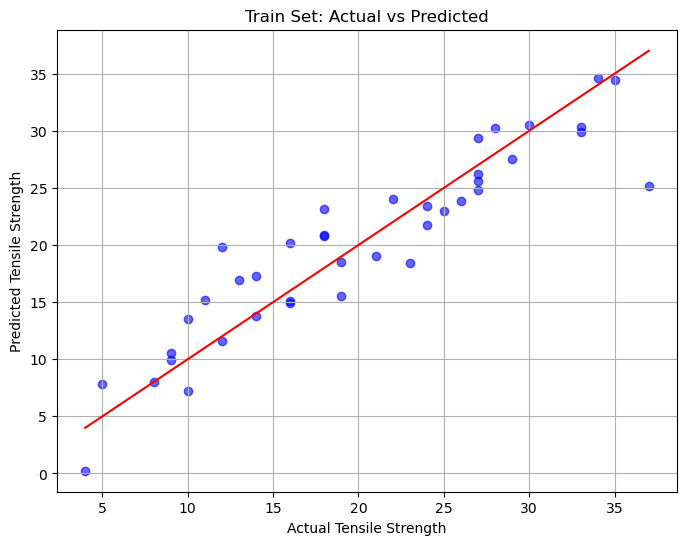

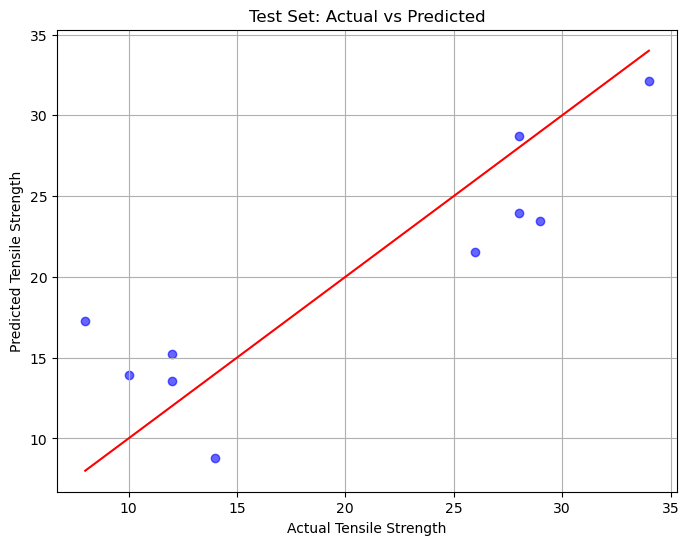

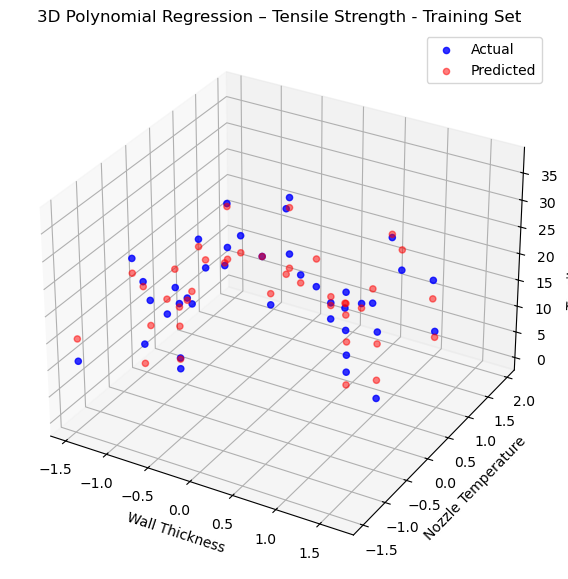

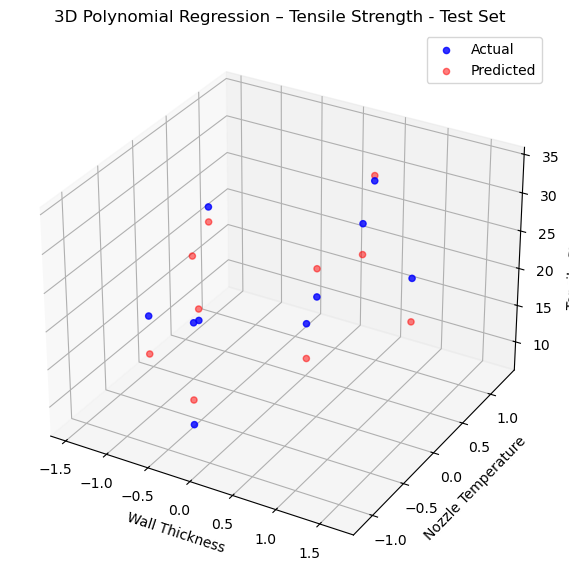

In [8]:

#Selecting features and target 
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features].values
y = df['tensile_strength'].values.reshape(-1, 1)

# Polynomial feature generation for 5 features
def generate_polynomial_features_5f(X):
    x1, x2, x3, x4, x5 = [X[:, i].reshape(-1, 1) for i in range(5)]
    poly_features = [x1, x2, x3, x4, x5,
                     x1**2, x2**2, x3**2, x4**2, x5**2,
                     x1*x2, x1*x3, x1*x4, x1*x5,
                     x2*x3, x2*x4, x2*x5,
                     x3*x4, x3*x5,
                     x4*x5]
    return np.hstack(poly_features)

#Transforming and normalising
X_poly = generate_polynomial_features_5f(X)
X_poly = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=5)

#implemented polynomial regression model
class PolynomialRegression:
    def __init__(self, learning_rate=0.08, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y
        for _ in range(self.iterations):
            self._gradient_descent()
        return self

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - y_pred)) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Training and predict
model = PolynomialRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluating performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nPolynomial Regression 2nd Degree - 5 Features- Tensile Strength")
#Printing the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Train Set: Actual vs Predicted")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Test Set: Actual vs Predicted")
plt.grid(True)
plt.show()

#3D Plot for Training Set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 0], y_train.flatten(), color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train[:, 1], X_train[:, 0], y_train_pred.flatten(), color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Wall Thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()

#3D Plot for Test Set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 1], X_test[:, 0], y_test.flatten(), color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test[:, 1], X_test[:, 0], y_test_pred.flatten(), color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Wall Thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()


Polynomial Regression 2nd Degree - 5 Features- Tensile Strength

Training Set:
Mean Absolute Error (MAE): 2.54
Mean Squared Error (MSE): 11.16
Root Mean Squared Error (RMSE) : 3.34
R-squared (R²): 0.85

Testing Set:
Mean Absolute Error (MAE) : 3.99
Mean Squared Error (MSE) : 21.30
Root Mean Squared Error (RMSE): 4.62
R-squared (R²) : 0.75


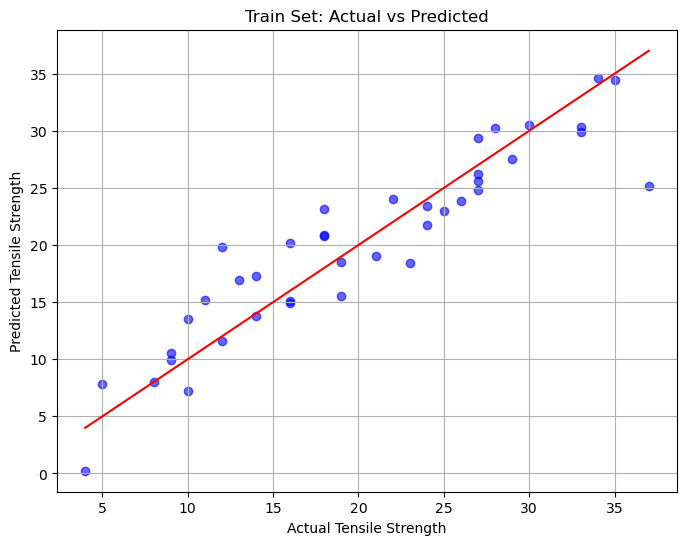

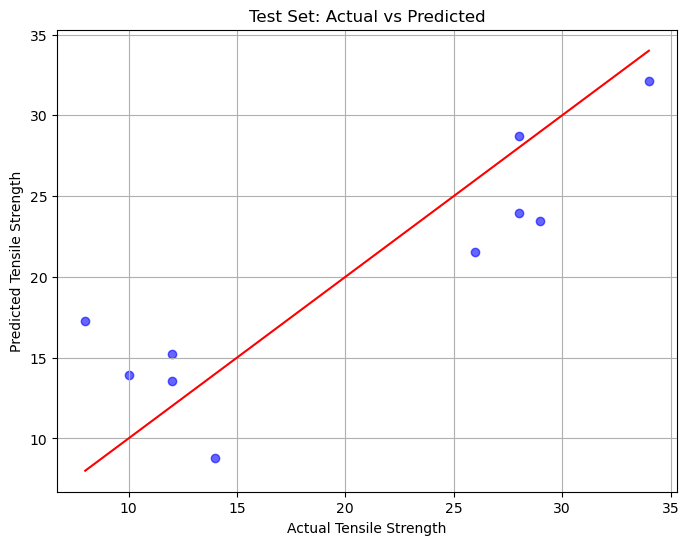

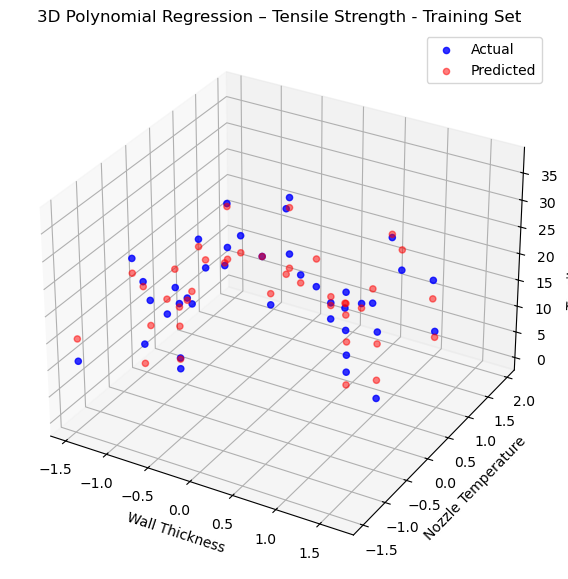

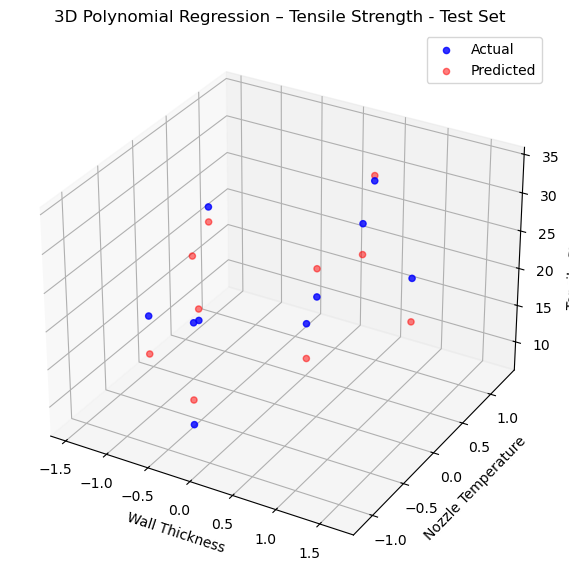

In [10]:

#Selecting features and target 
features = ['nozzle_temperature', 'wall_thickness', 'infill_density', 'layer_height', 'material_encoded']
X = df[features].values
y = df['tensile_strength'].values.reshape(-1, 1)

#Polynomial feature generation for 5 features
def generate_polynomial_features_5f(X):
    x1, x2, x3, x4, x5 = [X[:, i].reshape(-1, 1) for i in range(5)]
    poly_features = [x1, x2, x3, x4, x5,
                     x1**2, x2**2, x3**2, x4**2, x5**2,
                     x1*x2, x1*x3, x1*x4, x1*x5,
                     x2*x3, x2*x4, x2*x5,
                     x3*x4, x3*x5,
                     x4*x5]
    return np.hstack(poly_features)

#Transforming and normalising
X_poly = generate_polynomial_features_5f(X)
X_poly = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)

#Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=5)

#Impmelemted polynomial regression model
class PolynomialRegression:
    def __init__(self, learning_rate=0.08, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y
        for _ in range(self.iterations):
            self._gradient_descent()
        return self

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - y_pred)) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Training and predicting
model = PolynomialRegression()
model.fit(X_train, y_train)

#Ridge Regression
ridge_model = Ridge(alpha=1)  
ridge_model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluating performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nPolynomial Regression 2nd Degree - 5 Features- Tensile Strength")
#Printing the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Train Set: Actual vs Predicted")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("Test Set: Actual vs Predicted")
plt.grid(True)
plt.show()

#3D Plot for Training Set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 0], y_train.flatten(), color='blue', alpha=0.8, label='Actual')
ax.scatter(X_train[:, 1], X_train[:, 0], y_train_pred.flatten(), color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Wall Thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Training Set")
ax.legend()
plt.show()

#3D Plot for Test Set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 1], X_test[:, 0], y_test.flatten(), color='blue', alpha=0.8, label='Actual')
ax.scatter(X_test[:, 1], X_test[:, 0], y_test_pred.flatten(), color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Wall Thickness")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Tensile Strength")
ax.set_title("3D Polynomial Regression – Tensile Strength - Test Set")
ax.legend()
plt.show()